<a href="https://colab.research.google.com/github/Deepfull/BootCamp/blob/main/5%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data1 = pd.read_csv('https://raw.githubusercontent.com/Deepfull/BootCamp/main/sample1001.csv')
print(data1.shape)
df1 = data1.copy()
#df1[:3]

data2 = pd.read_csv('https://raw.githubusercontent.com/Deepfull/BootCamp/main/sample1002.csv')
print(data2.shape)
df2 = data2.copy()

(91, 4)
(60, 4)


In [3]:
df1['HVAC_Off'] = 0
df1['HVAC_On'] = 1

df2['HVAC_Off'] = 1
df2['HVAC_On'] = 0

In [18]:
df2[:5]
# df.columns

,Time,On_Off,CA_PM10,CA_PM2.5,HVAC_Off,HVAC_On
0,0,Off,32.66,19.97,1,0
1,1,Off,31.57,21.70,1,0
2,2,Off,32.11,20.93,1,0
3,3,Off,31.91,21.45,1,0
4,4,Off,33.26,21.30,1,0


Text(0, 0.5, 'Concentration')

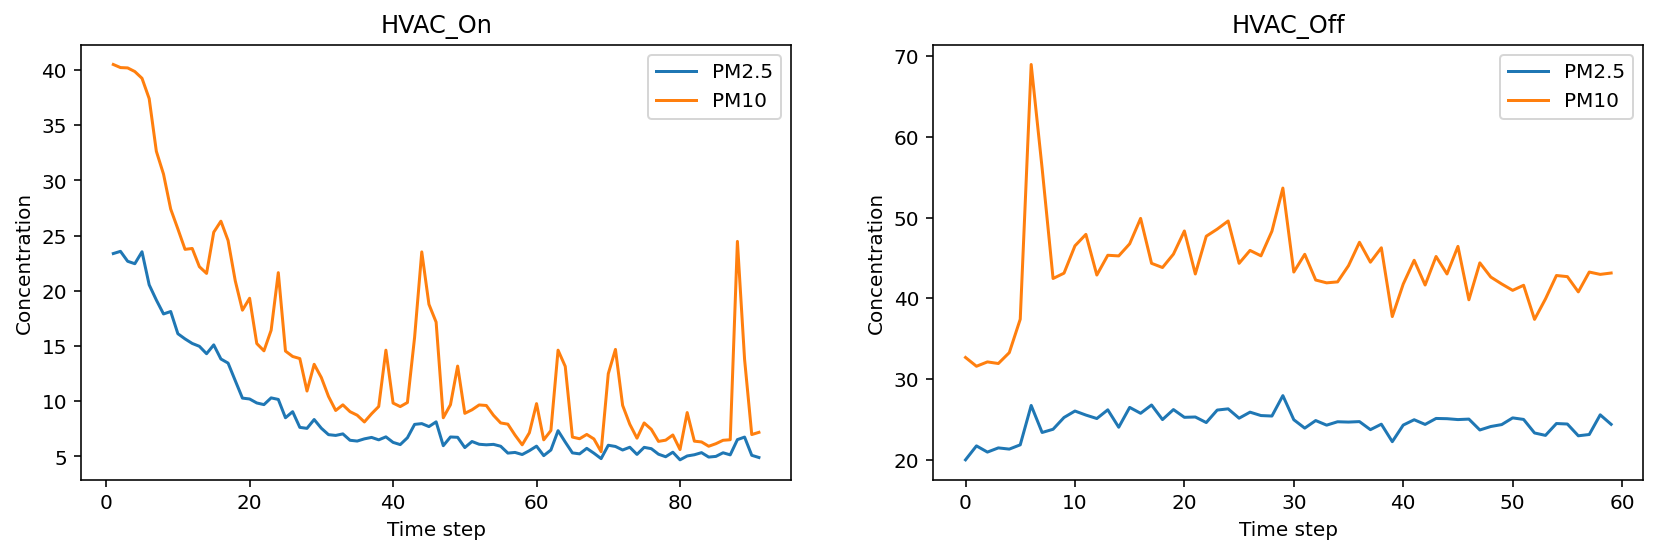

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.plot(df1['Time'], df1['CA_PM2.5'])
plt.plot(df1['Time'], df1['CA_PM10'])
plt.title('HVAC_On')
plt.legend(['PM2.5','PM10'])
plt.xlabel('Time step')
plt.ylabel('Concentration')

plt.subplot(1,2,2)
plt.plot(df2['Time'], df2['CA_PM2.5'])
plt.plot(df2['Time'], df2['CA_PM10'])
plt.title('HVAC_Off')
plt.legend(['PM2.5','PM10'])
plt.xlabel('Time step')
plt.ylabel('Concentration')

In [8]:
# t = t0일 때의 농도 값으로 t = t0 + 10일때의 농도 값을 예측 
# 학습데이터
# X           y
# data @ t=0  data @ t=10
# data @ t=1  data @ t=11
# data @ t=2  data @ t=12
# data @ t=3  data @ t=13

df1_x = df1[['CA_PM2.5','CA_PM10','HVAC_On','HVAC_Off']][:80]
df1_y = df1[['CA_PM2.5','CA_PM10']][10:90]

df2_x = df1[['CA_PM2.5','CA_PM10','HVAC_On','HVAC_Off']][:50]
df2_y = df1[['CA_PM2.5','CA_PM10']][10:60]

df_x = pd.concat([df1_x, df2_x]) 
df_y = pd.concat([df1_y, df2_y])

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state=9)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train =np.array(y_train)
y_test = np.array(y_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8539264075720185

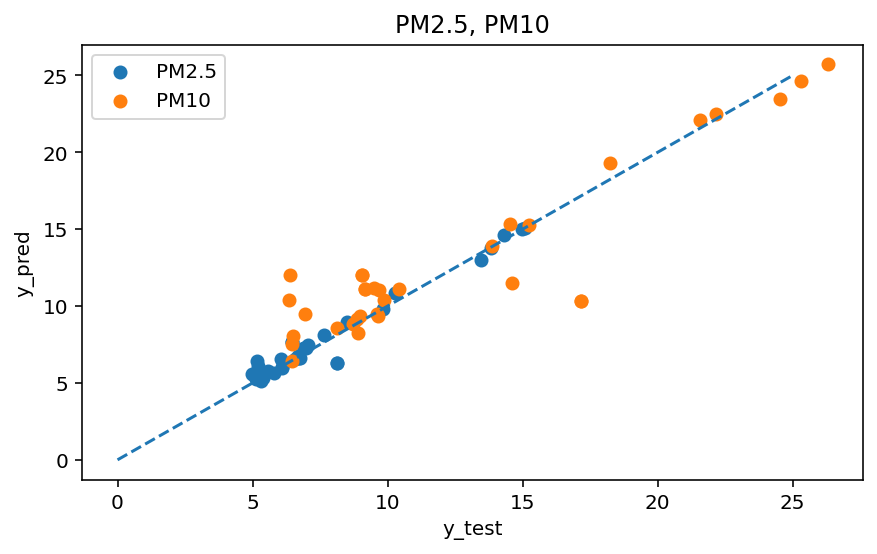

In [14]:
y_pred = rfr.predict(X_test)

plt.figure(figsize=(7,4))
plt.scatter(y_test[:,0],y_pred[:,0])
plt.scatter(y_test[:,1],y_pred[:,1])
plt.title('PM2.5, PM10')
plt.legend(['PM2.5','PM10'])
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot([0,25],[0,25],'--')

In [14]:
# t0 에서의 값으로 (t0+1) ~ (t0+10) 사이의 값을 예측
# 학습데이터
# X           y
# data @ t=0  data @ t=1~10
# data @ t=1  data @ t=2~11
# data @ t=2  data @ t=3~12
# data @ t=3  data @ t=4~13
#
# 만약에 t = (t0+1) ~ (t0+20) 사이의 값을 예측하고 싶다면
# 위의 학습으로 예측된 t0+10값을 X로 입력하여 다음 10개 time step 값을 예측함
# Sequential regression

# Linear Model(여러번 돌려야됨), MLP

# LSTM을 통한 시계열 예측, MLP의 depth가 있음